# Data Viz tests

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import psycopg2
from dotenv import load_dotenv
import os
import urllib.parse
load_dotenv()

True

In [14]:
connstring = f"postgresql+psycopg2://{os.getenv("PGUSER")}:{urllib.parse.quote_plus(os.getenv("PGPASSWORD"))}@{os.getenv("PGHOST")}:{os.getenv("PGPORT")}/{os.getenv("PGDATABASE")}"
engine = create_engine(connstring)

In [16]:
df = pd.read_sql("SELECT * FROM tracker_pedometer_step_count",engine)

In [27]:
colist = df.columns
walkdf = df[["walk_step","step_count_end_time","step_count_time_offset"]]

In [28]:
walkdf

,walk_step,step_count_end_time,step_count_time_offset
0,17,2025-07-05 09:38:00,UTC+0530
1,19,2025-07-05 09:39:00,UTC+0530
2,10,2025-07-05 09:40:00,UTC+0530
3,13,2025-07-05 09:48:00,UTC+0530
4,27,2025-07-05 13:10:00,UTC+0530
...,...,...,...
3619,10,2025-08-19 13:00:00,UTC+0530
3620,40,2025-08-19 13:18:00,UTC+0530
3621,73,2025-08-19 13:19:00,UTC+0530
3622,22,2025-08-19 13:20:00,UTC+0530


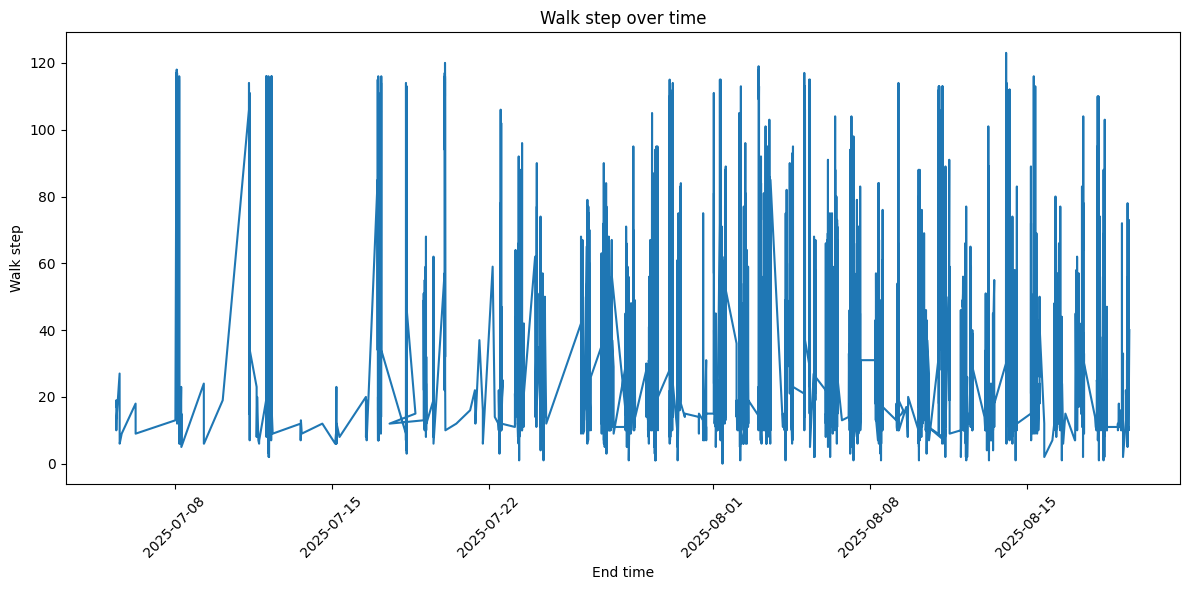

In [35]:

plt.figure(figsize=(12,6))
plt.plot(walkdf["step_count_end_time"],walkdf["walk_step"])
plt.xlabel("End time")
plt.ylabel("Walk step")
plt.title("Walk step over time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
dfhr = pd.read_sql("SELECT * FROM tracker_heart_rate",engine)
dfhr.columns

Index(['source', 'tag_id', 'heart_rate_create_sh_ver',
       'heart_rate_heart_beat_count', 'heart_rate_start_time',
       'heart_rate_custom', 'heart_rate_binning_data',
       'heart_rate_modify_sh_ver', 'heart_rate_update_time',
       'heart_rate_create_time', 'heart_rate_client_data_id', 'heart_rate_max',
       'heart_rate_min', 'heart_rate_client_data_ver',
       'heart_rate_time_offset', 'heart_rate_deviceuuid', 'heart_rate_comment',
       'heart_rate_pkg_name', 'heart_rate_end_time', 'heart_rate_datauuid',
       'heart_rate_heart_rate'],
      dtype='object')

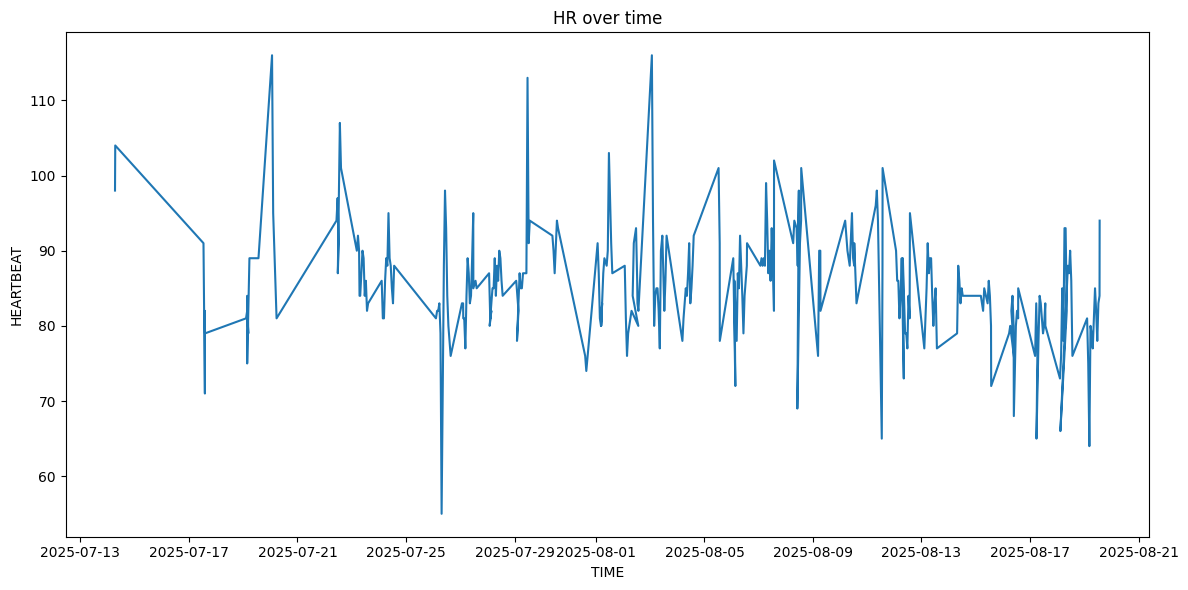

In [37]:
hrchartdf = dfhr[["heart_rate_end_time","heart_rate_heart_rate"]]
plt.figure(figsize= (12,6))
plt.plot(hrchartdf["heart_rate_end_time"],hrchartdf["heart_rate_heart_rate"])
plt.xlabel("TIME")
plt.ylabel("HEARTBEAT")
plt.title("HR over time")
plt.tight_layout()
plt.show()